# Text Classification and Regression Examples


## Question 1: 

* Use UCI’s sentiment dataset (https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences) to perform binary classification to classify reviews into positive or negative. Use k-fold cross validation and show loss/accuracy plots by epoch.
- Try a different activation function and report the difference. - Try a different optimizer and report the difference.

## Question 2: 
* Use Keras’ built-in Reuters dataset (from keras.datasets import reuters) to classify 46 different topics. Use k-fold cross validation and show loss/accuracy plots by epoch.
- Change number of layers, report the difference.
- Increase number of hidden units, report the difference. - Decrease number of hidden units, report the difference.

## Question 3: 

Use Keras’ built-in Boston House Pricing dataset (from keras.datasets import boston_housing) to perform regression and predict house prices. Use k-fold cross validation and show loss/MAE plots by epoch.
- Compare the results when using no regularizer, L2 regularizer and Dropout as a regularization method.
- Try a different loss function and report the difference.



In [36]:
## Question1
# Data import

filepath = ["../Downloads/sentiment labelled sentences/yelp_labelled.txt",
            "../Downloads/sentiment labelled sentences/amazon_cells_labelled.txt",
            "../Downloads/sentiment labelled sentences/imdb_labelled.txt"]

for  filepath in filepath:
    df = pd.read_csv(filepath, names=['sentence', 'label'], sep='\t')
    #df_list.append(df)
    df = pd.concat([df])
#randomize for l fold
#df = df.sample(frac=1).reset_index(drop=True)



In [37]:
#Data preprocesing
sentences = df['sentence'].values
#sentences
vectorizer = CountVectorizer(max_features=2000)
vectorizer.fit(sentences)
#vectorizer.vocabulary_
train_sdata=vectorizer.transform(sentences).toarray()
label=df['label'].values
#label = to_categorical(label)


In [38]:
# Model

def model_sent():
    modelst = models.Sequential()
    modelst.add(layers.Dense(32, activation='relu', input_shape=(2000,)))
    modelst.add(layers.Dense(32, activation='relu'))
    modelst.add(layers.Dense(1, activation='sigmoid'))
    modelst.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
    return modelst

# different activation function

def model_sent2():
    modelst = models.Sequential()
    modelst.add(layers.Dense(32, activation='softmax', input_shape=(2000,)))
    modelst.add(layers.Dense(32, activation='softmax'))
    modelst.add(layers.Dense(1, activation='sigmoid'))
    modelst.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
    return modelst

# different optimizer function

def model_sent3():
    modelst = models.Sequential()
    modelst.add(layers.Dense(32, activation='relu', input_shape=(2000,)))
    modelst.add(layers.Dense(32, activation='relu'))
    modelst.add(layers.Dense(1, activation='sigmoid'))
    modelst.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
    return modelst


k= 5
num_val_samples = len(train_sdata) // k
num_epochs = 50

all_acc_scores = []
all_loss_scores = []
all_tacc_scores = []
all_tloss_scores = []
all_acc_scores2 = []
all_loss_scores2 = []
all_tacc_scores2 = []
all_tloss_scores2 = []
all_acc_scores3 = []
all_loss_scores3 = []
all_tacc_scores3 = []
all_tloss_scores3 = []

for i in range(k):
    print('processing fold #', i)
    # Prepare the validation data: data from partition # k
    val_data = train_sdata[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = label[i * num_val_samples: (i + 1) * num_val_samples]
    # Prepare the training data: data from all other partitions
    partial_train_data = np.concatenate(
        [train_sdata[:i * num_val_samples],
         train_sdata[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [label[:i * num_val_samples],
         label[(i + 1) * num_val_samples:]],
            axis=0)
    # Train the model (
    model = model_sent ()
    history=model.fit(partial_train_data, partial_train_targets,validation_data=(val_data, val_targets)
              ,epochs=num_epochs, batch_size=16, verbose=0)
    
    accuracy_history = history.history['val_acc']
    loss_history = history.history['val_loss']
    
    # training acc and loss
    
    taccuracy_history=history.history['acc']
    tloss_history=history.history['loss']

    all_acc_scores.append(accuracy_history)
    all_loss_scores.append(loss_history)
    all_tacc_scores.append(taccuracy_history)
    all_tloss_scores.append(tloss_history)
    
    #print(history.history.keys())
    
    model = model_sent2 ()
    history=model.fit(partial_train_data, partial_train_targets,validation_data=(val_data, val_targets)
              ,epochs=num_epochs, batch_size=16, verbose=0)
    
     # training acc and loss
        
    accuracy_history2 = history.history['val_acc']
    loss_history2 = history.history['val_loss']
    
    taccuracy_history2=history.history['acc']
    tloss_history2=history.history['loss']
    
    all_acc_scores2.append(accuracy_history2)
    all_loss_scores2.append(loss_history2)
    
    all_tacc_scores2.append(taccuracy_history2)
    all_tloss_scores2.append(tloss_history2)
    
 
    
    
    model = model_sent3 ()
    history=model.fit(partial_train_data, partial_train_targets,validation_data=(val_data, val_targets)
              ,epochs=num_epochs, batch_size=16, verbose=0)
    
     # training acc and loss
    accuracy_history3 = history.history['val_acc']
    loss_history3 = history.history['val_loss']
    
    taccuracy_history3=history.history['acc']
    tloss_history3=history.history['loss']
    
    all_acc_scores3.append(accuracy_history3)
    all_loss_scores3.append(loss_history3)
    
    all_tacc_scores3.append(taccuracy_history3)
    all_tloss_scores3.append(tloss_history3)
    
    
   
    
    #Evaluate the model on the validation data
    #val_mse, val_accuracy = model.evaluate(val_data, val_targets, verbose=0)

    
       
 

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4


In [40]:
average_acc_history = [
    np.mean([x[i] for x in all_acc_scores]) for i in range(num_epochs)]
average_loss_history = [
    np.mean([x[i] for x in all_loss_scores]) for i in range(num_epochs)]
average_acc_history2 = [
    np.mean([x[i] for x in all_acc_scores2]) for i in range(num_epochs)]
average_loss_history2 = [
    np.mean([x[i] for x in all_loss_scores2]) for i in range(num_epochs)]
average_acc_history3 = [
    np.mean([x[i] for x in all_acc_scores3]) for i in range(num_epochs)]
average_loss_history3 = [
    np.mean([x[i] for x in all_loss_scores3]) for i in range(num_epochs)]

average_trainacc_history = [
    np.mean([x[i] for x in all_tacc_scores]) for i in range(num_epochs)]
average_trainloss_history = [
    np.mean([x[i] for x in all_tloss_scores]) for i in range(num_epochs)]
average_trainacc_history2 = [
    np.mean([x[i] for x in all_tacc_scores2]) for i in range(num_epochs)]
average_trainloss_history2 = [
    np.mean([x[i] for x in all_tloss_scores2]) for i in range(num_epochs)]
average_trainacc_history3 = [
    np.mean([x[i] for x in all_tacc_scores3]) for i in range(num_epochs)]
average_trainloss_history3 = [
    np.mean([x[i] for x in all_tloss_scores3]) for i in range(num_epochs)]



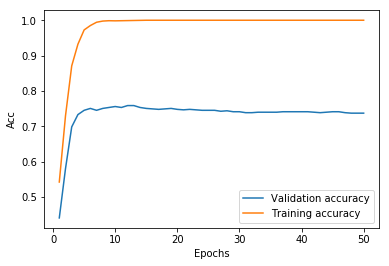

In [41]:
# Accuracy- epoch plotting
plt.plot(range(1, len(average_acc_history) + 1), average_acc_history,label='Validation accuracy')
plt.plot(range(1, len(average_trainacc_history) + 1), average_trainacc_history,label='Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()






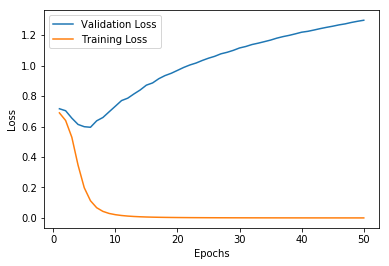

In [42]:
# Loss- epoch plotting

plt.plot(range(1, len(average_loss_history) + 1), average_loss_history,label='Validation Loss')
plt.plot(range(1, len(average_trainloss_history) + 1), average_trainloss_history,label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

The model overfitting after 8 epoch and best k-fold validation accuracy is 0.758

# Question1A

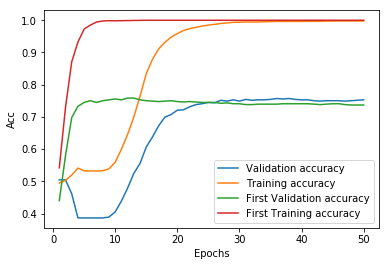

In [45]:
# Accuracy- epoch plotting
plt.plot(range(1, len(average_acc_history2) + 1), average_acc_history2,label='Validation accuracy')
plt.plot(range(1, len(average_trainacc_history2) + 1), average_trainacc_history2,label='Training accuracy')
plt.plot(range(1, len(average_acc_history) + 1), average_acc_history,label='First Validation accuracy')
plt.plot(range(1, len(average_trainacc_history) + 1), average_trainacc_history,label='First Training accuracy')

plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()



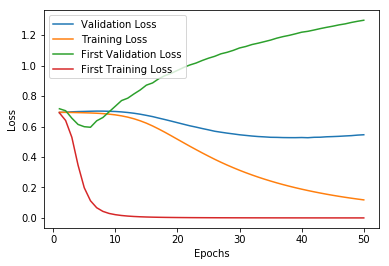

In [46]:

plt.plot(range(1, len(average_loss_history2) + 1), average_loss_history2,label='Validation Loss')
plt.plot(range(1, len(average_trainloss_history2) + 1), average_trainloss_history2,label='Training Loss')
plt.plot(range(1, len(average_loss_history) + 1), average_loss_history,label='First Validation Loss')
plt.plot(range(1, len(average_trainloss_history) + 1), average_trainloss_history,label='First Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

I used softmax activation function instead of relu.It provides better validation accuracy and loss. Also the model starts overfitting later than reference network

# Question1B

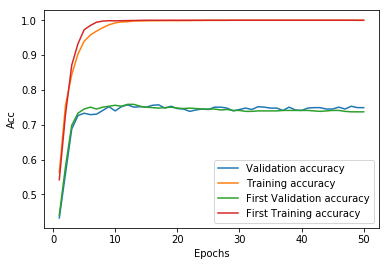

In [50]:
# Accuracy- epoch plotting
plt.plot(range(1, len(average_acc_history3) + 1), average_acc_history3,label='Validation accuracy')
plt.plot(range(1, len(average_trainacc_history3) + 1), average_trainacc_history3,label='Training accuracy')
plt.plot(range(1, len(average_acc_history) + 1), average_acc_history,label='First Validation accuracy')
plt.plot(range(1, len(average_trainacc_history) + 1), average_trainacc_history,label='First Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()



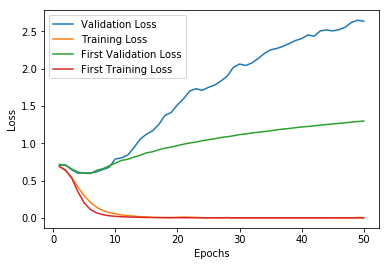

In [51]:
# Loss- epoch plotting

plt.plot(range(1, len(average_loss_history3) + 1), average_loss_history3,label='Validation Loss')
plt.plot(range(1, len(average_trainloss_history3) + 1), average_trainloss_history3,label='Training Loss')
plt.plot(range(1, len(average_loss_history) + 1), average_loss_history,label='First Validation Loss')
plt.plot(range(1, len(average_trainloss_history) + 1), average_trainloss_history,label='First Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

The model with different optimizer gives very similar accuracy and loss with respect to reference.


## Question2

In [4]:
from keras import models
from keras import layers
from keras.datasets import reuters
from keras.datasets import boston_housing
from keras import regularizers
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import OneHotEncoder
from keras.utils import to_categorical


In [5]:
# data import

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)


In [6]:
#data processing

def vectorize_sequences(sequences,dimension ):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results


# Vectorize data

x_train = vectorize_sequences(train_data,10000)
y_train = vectorize_sequences(train_labels,46)


#max([max(sequence) for sequence in train_data])
#y_train.shape

In [69]:
# Model 

def model_reuters():
    modelr = models.Sequential()
    modelr.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
    modelr.add(layers.Dense(64, activation='relu'))
    modelr.add(layers.Dense(46, activation='softmax'))
    modelr.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
    return modelr


# change number of layers
def model_reuters2():
    modelr = models.Sequential()
    modelr.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
   # modelr.add(layers.Dense(64, activation='relu'))
    modelr.add(layers.Dense(46, activation='softmax'))
    modelr.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
    return modelr

# increase  number of hidden units
def model_reuters3():
    modelr = models.Sequential()
    modelr.add(layers.Dense(96, activation='relu', input_shape=(10000,)))
    modelr.add(layers.Dense(96, activation='relu'))
    modelr.add(layers.Dense(46, activation='softmax'))
    modelr.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
    return modelr

def model_reuters4():
    modelr = models.Sequential()
    modelr.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
    modelr.add(layers.Dense(32, activation='relu'))
    modelr.add(layers.Dense(46, activation='softmax'))
    modelr.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
    return modelr



In [70]:
# k-fold validation

k= 5
num_val_samples = len(x_train) // k
num_epochs = 20

allr_acc_scores = []
allr_loss_scores = []
allr_acc_scores2 = []
allr_loss_scores2 = []
allr_acc_scores3 = []
allr_loss_scores3 = []
allr_acc_scores4 = []
allr_loss_scores4 = []
allr_tacc_scores = []
allr_tloss_scores = []
allr_tacc_scores2 = []
allr_tloss_scores2 = []
allr_tacc_scores3 = []
allr_tloss_scores3 = []
allr_tacc_scores4 = []
allr_tloss_scores4 = []

for i in range(k):
    print('processing fold #', i)
    # Prepare the validation data: data from partition # k
    val_data = x_train[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = y_train[i * num_val_samples: (i + 1) * num_val_samples]
    # Prepare the training data: data from all other partitions
    partial_train_data = np.concatenate(
        [x_train[:i * num_val_samples],
         x_train[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [y_train[:i * num_val_samples],
         y_train[(i + 1) * num_val_samples:]],
axis=0)
    # Train the model (in silent mode, verbose=0)
    model = model_reuters ()
    history=model.fit(partial_train_data, partial_train_targets,validation_data=(val_data, val_targets)
              ,epochs=num_epochs, batch_size=512, verbose=0)
    
    
    accuracy_history = history.history['val_acc']
    loss_history = history.history['val_loss']
    
    taccuracy_history = history.history['acc']
    tloss_history = history.history['loss']
    
    allr_acc_scores.append(accuracy_history)
    allr_loss_scores.append(loss_history)
    
    allr_tacc_scores.append(taccuracy_history)
    allr_tloss_scores.append(tloss_history)
    
    
    model = model_reuters2 ()
    history=model.fit(partial_train_data, partial_train_targets,validation_data=(val_data, val_targets)
              ,epochs=num_epochs, batch_size=512, verbose=0)
    
    #train and validation metrics
    
    accuracy_history2 = history.history['val_acc']
    loss_history2 = history.history['val_loss']
    
    taccuracy_history2 = history.history['acc']
    tloss_history2 = history.history['loss']
    
    
    allr_acc_scores2.append(accuracy_history2)
    allr_loss_scores2.append(loss_history2)
    
    allr_tacc_scores2.append(taccuracy_history2)
    allr_tloss_scores2.append(tloss_history2)
    
    
    #model 3
    
    model = model_reuters3 ()
    history=model.fit(partial_train_data, partial_train_targets,validation_data=(val_data, val_targets)
              ,epochs=num_epochs, batch_size=512, verbose=0)
    
    accuracy_history3 = history.history['val_acc']
    loss_history3 = history.history['val_loss']
    
    taccuracy_history3 = history.history['acc']
    tloss_history3 = history.history['loss']
    
    allr_acc_scores3.append(accuracy_history3)
    allr_loss_scores3.append(loss_history3)
    
    allr_tacc_scores3.append(taccuracy_history3)
    allr_tloss_scores3.append(tloss_history3)
    
    # model 4
    
    
    model = model_reuters4 ()
    history=model.fit(partial_train_data, partial_train_targets,validation_data=(val_data, val_targets)
              ,epochs=num_epochs, batch_size=512, verbose=0)
    
    accuracy_history4 = history.history['val_acc']
    loss_history4 = history.history['val_loss']
    
    taccuracy_history4 = history.history['acc']
    tloss_history4 = history.history['loss']
    
    allr_acc_scores4.append(accuracy_history4)
    allr_loss_scores4.append(loss_history4)
    
    
    allr_tacc_scores4.append(taccuracy_history4)
    allr_tloss_scores4.append(tloss_history4)
    
  

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4


In [71]:
# average acc and loss to epoch

    averager_acc_history = [
    np.mean([x[i] for x in allr_acc_scores]) for i in range(num_epochs)]
    
    averager_loss_history = [
    np.mean([x[i] for x in allr_loss_scores]) for i in range(num_epochs)]
    
    averager_acc_history2 = [
    np.mean([x[i] for x in allr_acc_scores2]) for i in range(num_epochs)]
    
    averager_loss_history2 = [
    np.mean([x[i] for x in allr_loss_scores2]) for i in range(num_epochs)]
    
    averager_acc_history3 = [
    np.mean([x[i] for x in allr_acc_scores3]) for i in range(num_epochs)]
    
    averager_loss_history3 = [
    np.mean([x[i] for x in allr_loss_scores3]) for i in range(num_epochs)]
    
    averager_acc_history4 = [
    np.mean([x[i] for x in allr_acc_scores4]) for i in range(num_epochs)]
    
    averager_loss_history4 = [
    np.mean([x[i] for x in allr_loss_scores4]) for i in range(num_epochs)]
    
    #Train metrics
    
    averager_tacc_history = [
    np.mean([x[i] for x in allr_tacc_scores]) for i in range(num_epochs)]
    
    averager_tloss_history = [
    np.mean([x[i] for x in allr_tloss_scores]) for i in range(num_epochs)]
    
    averager_tacc_history2 = [
    np.mean([x[i] for x in allr_tacc_scores2]) for i in range(num_epochs)]
    
    averager_tloss_history2 = [
    np.mean([x[i] for x in allr_tloss_scores2]) for i in range(num_epochs)]
    
    averager_tacc_history3 = [
    np.mean([x[i] for x in allr_tacc_scores3]) for i in range(num_epochs)]
    
    averager_tloss_history3 = [
    np.mean([x[i] for x in allr_tloss_scores3]) for i in range(num_epochs)]
    
    averager_tacc_history4 = [
    np.mean([x[i] for x in allr_tacc_scores4]) for i in range(num_epochs)]
    
    averager_tloss_history4 = [
    np.mean([x[i] for x in allr_tloss_scores4]) for i in range(num_epochs)]
    
    
    

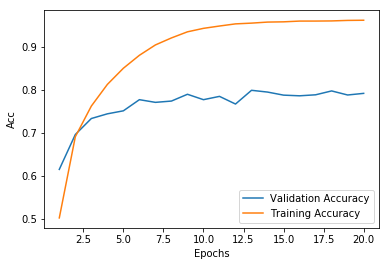

In [72]:

# Accuracy- epoch plotting
plt.plot(range(1, len(averager_acc_history) + 1), averager_acc_history,label='Validation Accuracy')
plt.plot(range(1, len(averager_tacc_history) + 1), averager_tacc_history,label='Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()


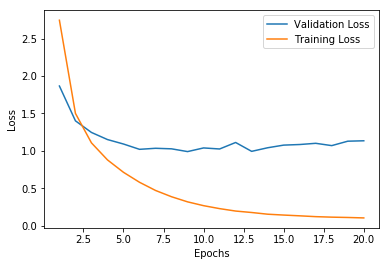

In [73]:
# Loss- epoch plotting

plt.plot(range(1, len(averager_loss_history) + 1), averager_loss_history,label='Validation Loss')
plt.plot(range(1, len(averager_tloss_history) + 1), averager_tloss_history,label='Training Loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

## Question2A

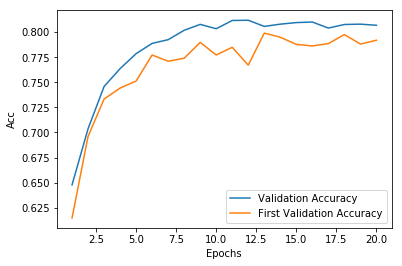

In [74]:
# Accuracy- epoch plotting
plt.plot(range(1, len(averager_acc_history2) + 1), averager_acc_history2,label='Validation Accuracy')
#plt.plot(range(1, len(averager_tacc_history2) + 1), averager_tacc_history2,label='Training Accuracy')
plt.plot(range(1, len(averager_acc_history) + 1), averager_acc_history,label='First Validation Accuracy')
#plt.plot(range(1, len(averager_tacc_history) + 1), averager_tacc_history,label='First Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()



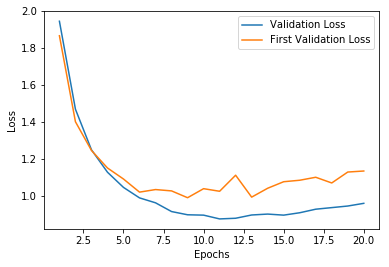

In [76]:
# Loss- epoch plotting

plt.plot(range(1, len(averager_loss_history2) + 1), averager_loss_history2,label='Validation Loss')
#plt.plot(range(1, len(averager_tloss_history2) + 1), averager_tloss_history2,label='Training Loss')
plt.plot(range(1, len(averager_loss_history) + 1), averager_loss_history,label='First Validation Loss')
#plt.plot(range(1, len(averager_tloss_history) + 1), averager_tloss_history,label='First Training Loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

The accuracy increased and loss decreased when ı use 2 layer network instead of 3 layer

## Question2B

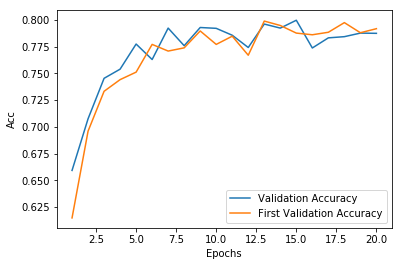

In [79]:
# Accuracy- epoch plotting
plt.plot(range(1, len(averager_acc_history3) + 1), averager_acc_history3,label='Validation Accuracy')
#plt.plot(range(1, len(averager_tacc_history3) + 1), averager_tacc_history3,label='Training Accuracy')
plt.plot(range(1, len(averager_acc_history) + 1), averager_acc_history,label='First Validation Accuracy')


plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()

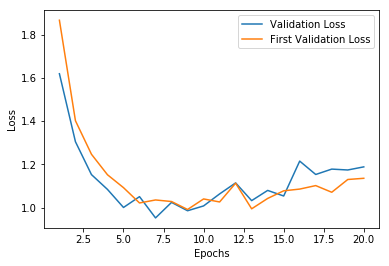

In [83]:
# Loss- epoch plotting
plt.plot(range(1, len(averager_loss_history3) + 1), averager_loss_history3,label='Validation Loss')
#plt.plot(range(1, len(averager_tloss_history2) + 1), averager_tloss_history2,label='Training Loss')
plt.plot(range(1, len(averager_loss_history) + 1), averager_loss_history,label='First Validation Loss')
#plt.plot(range(1, len(averager_tloss_history) + 1), averager_tloss_history,label='First Training Loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

I increased number of hidden units then it decreased loss but overfits more. Accuracy value of the model is so similar to referance

## Question2C

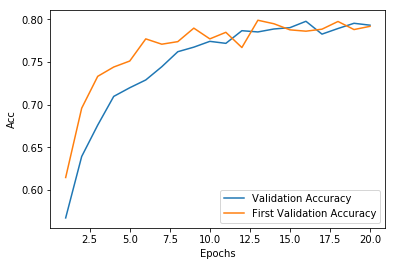

In [81]:
# Accuracy- epoch plotting
plt.plot(range(1, len(averager_acc_history4) + 1), averager_acc_history4,label='Validation Accuracy')
#plt.plot(range(1, len(averager_tacc_history4) + 1), averager_tacc_history4,label='Training Accuracy')
plt.plot(range(1, len(averager_acc_history) + 1), averager_acc_history,label='First Validation Accuracy')



plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()

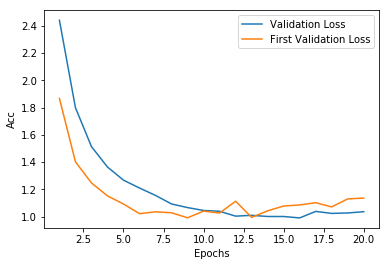

In [82]:
# Loss- epoch plotting
plt.plot(range(1, len(averager_loss_history4) + 1), averager_loss_history4,label='Validation Loss')
#plt.plot(range(1, len(averager_tloss_history2) + 1), averager_tloss_history2,label='Training Loss')
plt.plot(range(1, len(averager_loss_history) + 1), averager_loss_history,label='First Validation Loss')
#plt.plot(range(1, len(averager_tloss_history) + 1), averager_tloss_history,label='First Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()

The model starts overfitting later and reduces overfitting after decreasing number of hidden units. Its  accuracy is same but reference is noisier 

# Question3


In [52]:
#Data Import and Preprocessing

(train_datahouse, train_targetshouse), (test_data, test_targets) =  boston_housing.load_data()

# normalize data
mean = train_datahouse.mean(axis=0)
train_datahouse -= mean
std = train_datahouse.std(axis=0)
train_datahouse /= std

In [57]:
## Build model


def model_houseprice():
    modelh = models.Sequential()
    modelh.add(layers.Dense(32, activation='relu',
                        input_shape=(train_datahouse.shape[1],)))
    modelh.add(layers.Dense(32, activation='relu'))
    modelh.add(layers.Dense(1))
    modelh.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return modelh


# l2 regulizer and drop out
def model_housepricel2():
    modelh = models.Sequential()
    modelh.add(layers.Dense(32, activation='relu',
                        input_shape=(train_datahouse.shape[1],),
                        kernel_regularizer=regularizers.l2(0.01)))
    model.add(layers.Dropout(0.5))
    modelh.add(layers.Dense(32, activation='relu'))
    modelh.add(layers.Dense(1))
    modelh.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return modelh

# different loss function
def model_houseprice3():
    modelh = models.Sequential()
    modelh.add(layers.Dense(32, activation='relu',
                        input_shape=(train_datahouse.shape[1],)))
    modelh.add(layers.Dense(32, activation='relu'))
    modelh.add(layers.Dense(1))
    modelh.compile(optimizer='rmsprop', loss='mape', metrics=['mae'])
    return modelh



k=5
num_epochs = 100

num_val_samples = len(train_datahouse) // k

all_mae_histories = []
all_mae_histories2 = []
all_mae_histories3 = []
all_loss_histories = []
all_loss_histories2 = []
all_loss_histories3 = []

# train metrics
all_tmae_histories = []
all_tmae_histories2 = []
all_tmae_histories3 = []
all_tloss_histories = []
all_tloss_histories2 = []
all_tloss_histories3 = []




for i in range(k):
    print('processing fold #', i)
    # Prepare the validation data: data from partition # k
    val_hdata = train_datahouse[i * num_val_samples: (i + 1) * num_val_samples]
    val_htargets = train_targetshouse[i * num_val_samples: (i + 1) * num_val_samples]
    # Prepare the training data: data from all other partitions
    partial_train_hdata = np.concatenate(
        [train_datahouse[:i * num_val_samples],
         train_datahouse[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_htargets = np.concatenate(
        [train_targetshouse[:i * num_val_samples],
         train_targetshouse[(i + 1) * num_val_samples:]],
axis=0)
    # Build the Keras model (already compiled)
    model = model_houseprice()
    # Train the model (in silent mode, verbose=0)
    history = model.fit(partial_train_hdata, partial_train_htargets,
                        validation_data=(val_hdata, val_htargets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    
    mae_history = history.history['val_mean_absolute_error']
    all_mae_histories.append(mae_history)
    
    loss_history = history.history['val_loss']
    all_loss_histories.append(mae_history)
    
    tmae_history = history.history['mean_absolute_error']
    all_tmae_histories.append(tmae_history)
    
    tloss_history = history.history['loss']
    all_tloss_histories.append(tloss_history)
    
    
    
    model = model_housepricel2()
    # Train the model (in silent mode, verbose=0)
    history = model.fit(partial_train_hdata, partial_train_htargets,
                        validation_data=(val_hdata, val_htargets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    
    
    mae_history = history.history['val_loss']
    all_mae_histories2.append(mae_history)
    
    loss_history = history.history['val_mean_absolute_error']
    all_loss_histories2.append(loss_history)
    
    tmae_history = history.history['mean_absolute_error']
    all_tmae_histories2.append(tmae_history)
    
    tloss_history = history.history['loss']
    all_tloss_histories2.append(tloss_history)
    
    
    model = model_houseprice3()
    # Train the model (in silent mode, verbose=0)
    history = model.fit(partial_train_hdata, partial_train_htargets,
                        validation_data=(val_hdata, val_htargets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    
    
    mae_history = history.history['val_loss']
    all_mae_histories3.append(mae_history)
    
    loss_history = history.history['val_mean_absolute_error']
    all_loss_histories3.append(loss_history)
    
    tmae_history = history.history['mean_absolute_error']
    all_tmae_histories3.append(tmae_history)
    
    tloss_history = history.history['loss']
    all_tloss_histories3.append(tloss_history)
    
    
   
    

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4


In [58]:
 average_mae_history = [ np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]
    
 average_mae_history2 = [ np.mean([x[i] for x in all_mae_histories2]) for i in range(num_epochs)]

 average_mae_history3 = [ np.mean([x[i] for x in all_mae_histories3]) for i in range(num_epochs)]
    
    
 average_tmae_history = [
    np.mean([x[i] for x in all_tmae_histories]) for i in range(num_epochs)]
 average_tmae_history2 = [
    np.mean([x[i] for x in all_tmae_histories2]) for i in range(num_epochs)]
 average_tmae_history3 = [
    np.mean([x[i] for x in all_tmae_histories3]) for i in range(num_epochs)]


 average_loss_history = [
    np.mean([x[i] for x in all_loss_histories]) for i in range(num_epochs)]
 average_loss_history2 = [
    np.mean([x[i] for x in all_loss_histories2]) for i in range(num_epochs)]
 average_tloss_history3 = [
    np.mean([x[i] for x in all_loss_histories3]) for i in range(num_epochs)]
    
    
 average_tloss_history = [
    np.mean([x[i] for x in all_tloss_histories]) for i in range(num_epochs)]
 average_tloss_history2 = [
    np.mean([x[i] for x in all_tloss_histories2]) for i in range(num_epochs)]
 average_tloss_history3 = [
    np.mean([x[i] for x in all_tloss_histories3]) for i in range(num_epochs)]
    
    

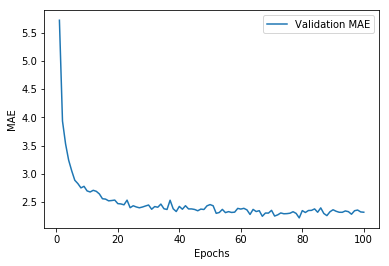

In [60]:
#MAE - Epoch plotting
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history,label='Validation MAE')
#plt.plot(range(1, len(average_tmae_history) + 1), average_tmae_history,label='Training MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

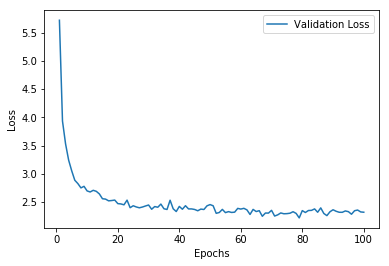

In [61]:
#Loss - Epoch plotting
plt.plot(range(1, len(average_loss_history) + 1), average_loss_history,label='Validation Loss')
#plt.plot(range(1, len(average_tloss_history) + 1), average_tloss_history,label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

The validation MAE reachs best value after 80 epochs. Then, the model start overfitting

## Question3A

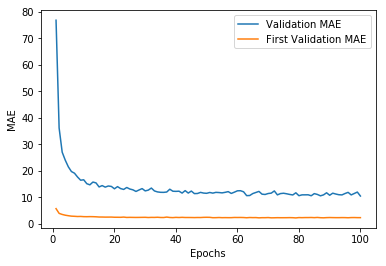

In [63]:
#MAE - Epoch plotting
plt.plot(range(1, len(average_mae_history2) + 1), average_mae_history2,label='Validation MAE')
#plt.plot(range(1, len(average_tmae_history2) + 1), average_tmae_history2,label='Training MAE')
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history,label='First Validation MAE')
#plt.plot(range(1, len(average_tmae_history) + 1), average_tmae_history,label='First Training MAE')

plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

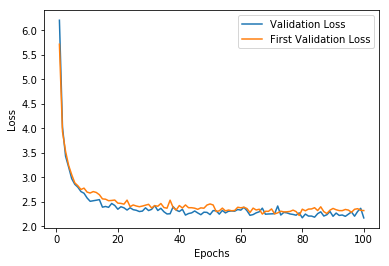

In [64]:
#Loss - Epoch plotting
plt.plot(range(1, len(average_loss_history2) + 1), average_loss_history2,label='Validation Loss')
#plt.plot(range(1, len(average_tloss_history2) + 1), average_tloss_history2,label='Training Loss')
plt.plot(range(1, len(average_loss_history) + 1), average_loss_history,label='First Validation Loss')
#plt.plot(range(1, len(average_tloss_history) + 1), average_tloss_history,label='First Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

 I added L2 regularizer and Dropout and it increased MAE values of model but the model starts overfitting later

## Question3B

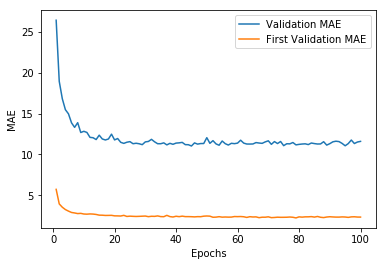

In [66]:
#MAE - Epoch plotting
plt.plot(range(1, len(average_mae_history3) + 1), average_mae_history3,label='Validation MAE')
#plt.plot(range(1, len(average_tmae_history3) + 1), average_tmae_history3,label='Training MAE')
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history,label='First Validation MAE')
#plt.plot(range(1, len(average_tmae_history) + 1), average_tmae_history,label='First Training MAE')

plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

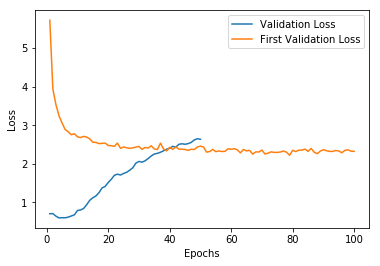

In [68]:
#Loss - Epoch plotting
plt.plot(range(1, len(average_loss_history3) + 1), average_loss_history3,label='Validation Loss')
plt.plot(range(1, len(average_loss_history) + 1), average_loss_history,label='First Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

It increased MAE values and the model started overfitting too early after 18 Epoch